#Graph format

The EDeN library allows the vectorization of graphs, i.e. the transformation of graphs into sparse vectors.

The graphs that can be processed by the EDeN library have the following restrictions:
- the graphs are implemented as *networkx* graphs
- nodes and edges have identifiers: the following identifiers are used as reserved words
    1. label
    2. weight
    3. entity
    4. nesting
    
- nodes and edges **must** have the 'label' attribute 
- the 'label' attribute can be of one of the following types: 
    1. string 
    2. vector 
    3. dictionary
    
 strings are used to represent categorical values; 
 dictionaries are used to represent sparse vectors: keys are of string type and values are of type float 
- nodes and edges **can** have a 'weight' attribute of type float 
- nodes **can** have a 'entity' attribute of type string 
- nesting edges **must** have a 'nesting' attribute of type boolean set to True

In [267]:
%matplotlib inline
import pylab as plt

In [268]:
import networkx as nx

G=nx.Graph()

G.add_node(0)
G.add_node(1)
G.add_node(2)

G.node[0]['label'] = 'A'
G.node[1]['label'] = 'B'
G.node[2]['label'] = 'C'

G.add_edge(0,1)
G.add_edge(1,2)

G.edge[0][1]['label'] = 'a'
G.edge[1][2]['label'] = 'b'

In [269]:
from eden.util import display
print display.serialize_graph(G)

{
    "directed":false,
    "graph":[],
    "nodes":[
        {
            "id":0,
            "label":"A"
        },
        {
            "id":1,
            "label":"B"
        },
        {
            "id":2,
            "label":"C"
        }
    ],
    "links":[
        {
            "source":0,
            "target":1,
            "label":"a"
        },
        {
            "source":1,
            "target":2,
            "label":"b"
        }
    ],
    "multigraph":false
}


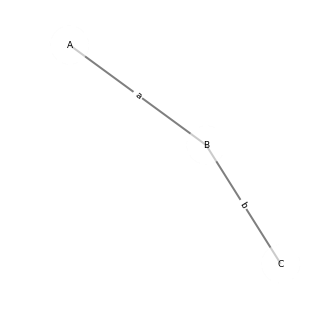

In [270]:
display.draw_graph(G, size=5, node_size=1500)

In [271]:
G=nx.Graph()
G.add_node(0)
G.add_node(1)
G.add_node(2)
G.node[0]['label'] = [1,0,0]
G.node[1]['label'] = [0,1,0]
G.node[2]['label'] = [0,0,1]

G.add_edge(0,1)
G.add_edge(1,2)

G.edge[0][1]['label'] = 'a'
G.edge[1][2]['label'] = 'b'

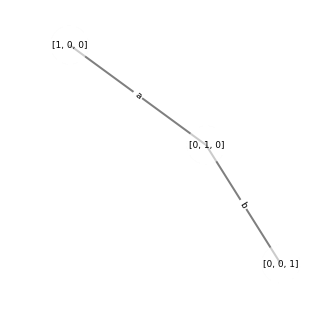

In [272]:
display.draw_graph(G, size=5, node_size=1500)

In [273]:
G=nx.Graph()
G.add_node(0)
G.add_node(1)
G.add_node(2)

G.node[0]['label'] = {'1':1, '10':1, '100':1}
G.node[1]['label'] = {'11':1, '110':1, '1100':1}
G.node[2]['label'] = {'111':1, '1110':1, '11100':1}

G.add_edge(0,1)
G.add_edge(1,2)

G.edge[0][1]['label'] = 'a'
G.edge[1][2]['label'] = 'b'

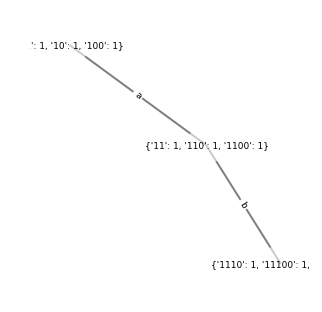

In [274]:
display.draw_graph(G, size=5, node_size=1500)

In [275]:
G=nx.Graph()

G.add_node(0)
G.add_node(1)
G.add_node(2)

G.node[0]['label'] = 'A'
G.node[1]['label'] = 'B'
G.node[2]['label'] = 'C'

G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(0,2)

G.edge[0][1]['label'] = 'a'
G.edge[1][2]['label'] = 'b'
G.edge[1][2]['nesting'] = True
G.edge[0][2]['label'] = 'c'
G.edge[0][2]['nesting'] = True

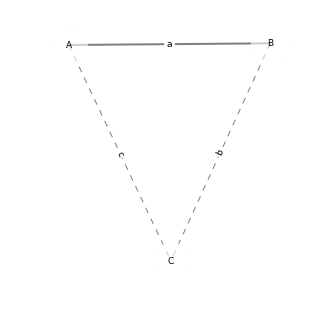

In [276]:
display.draw_graph(G, size=5, node_size=1500)

Build graphs and then display them

In [277]:
import networkx as nx
graph_list = []

In [278]:
G=nx.Graph()
G.add_node(0, label='A', entity='CATEG')
G.add_node(1, label='B', entity='CATEG')
G.add_node(2, label='C', entity='CATEG')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='A', entity='CATEG')
G.add_node(1, label='B', entity='CATEG')
G.add_node(2, label='X', entity='CATEG')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='A', entity='CATEG')
G.add_node(1, label='B', entity='CATEG')
G.add_node(2, label='X', entity='CATEG')
G.add_edge(0,1, label='x', entity='CATEG_EDGE')
G.add_edge(1,2, label='x', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label='X', entity='CATEG')
G.add_node(1, label='X', entity='CATEG')
G.add_node(2, label='X', entity='CATEG')
G.add_edge(0,1, label='x', entity='CATEG_EDGE')
G.add_edge(1,2, label='x', entity='CATEG_EDGE')
graph_list += [G.copy()]

In [279]:
G=nx.Graph()
G.add_node(0, label=[1,0,0], entity='VEC')
G.add_node(1, label=[0,1,0], entity='VEC')
G.add_node(2, label=[0,0,1], entity='VEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label=[1,1,0], entity='VEC')
G.add_node(1, label=[0,1,1], entity='VEC')
G.add_node(2, label=[0,0,1], entity='VEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label=[1,0.1,0.2], entity='VEC')
G.add_node(1, label=[0.3,1,0.4], entity='VEC')
G.add_node(2, label=[0.5,0.6,1], entity='VEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label=[0.1,0.2,0.3], entity='VEC')
G.add_node(1, label=[0.4,0.5,0.6], entity='VEC')
G.add_node(2, label=[0.7,0.8,0.9], entity='VEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

In [280]:
G=nx.Graph()
G.add_node(0, label={'A':1, 'B':1, 'C':1}, entity='SPVEC')
G.add_node(1, label={'a':1, 'B':1, 'C':1}, entity='SPVEC')
G.add_node(2, label={'a':1, 'b':1, 'C':1}, entity='SPVEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label={'A':1,  'C':1, 'D':1}, entity='SPVEC')
G.add_node(1, label={'a':1,  'C':1, 'D':1}, entity='SPVEC')
G.add_node(2, label={'a':1,  'C':1, 'D':1}, entity='SPVEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label={'A':1, 'D':1, 'E':1}, entity='SPVEC')
G.add_node(1, label={'a':1, 'D':1, 'E':1}, entity='SPVEC')
G.add_node(2, label={'a':1, 'D':1, 'E':1}, entity='SPVEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

G=nx.Graph()
G.add_node(0, label={'A':1, 'B':1, 'C':1, 'D':1, 'E':1}, entity='SPVEC')
G.add_node(1, label={'a':1, 'B':1, 'C':1, 'D':1, 'E':1}, entity='SPVEC')
G.add_node(2, label={'a':1, 'b':1, 'C':1, 'D':1, 'E':1}, entity='SPVEC')
G.add_edge(0,1, label='a', entity='CATEG_EDGE')
G.add_edge(1,2, label='b', entity='CATEG_EDGE')
graph_list += [G.copy()]

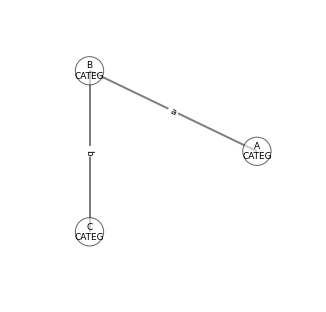

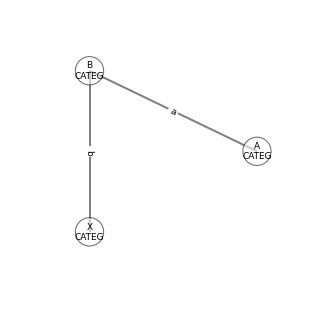

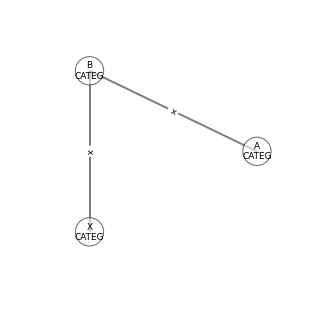

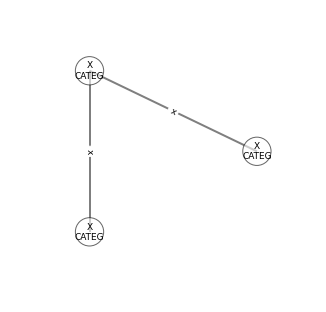

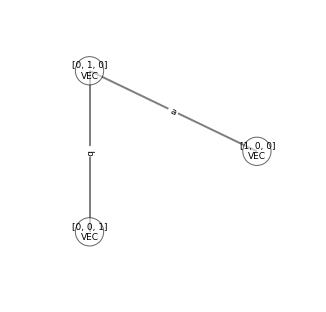

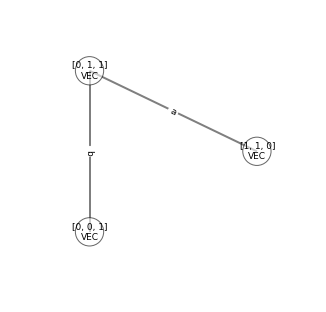

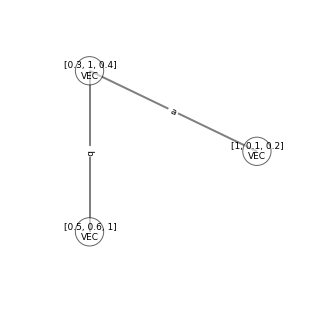

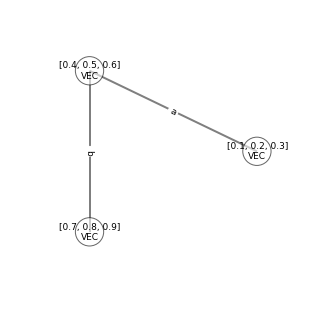

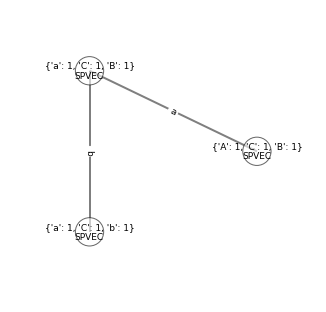

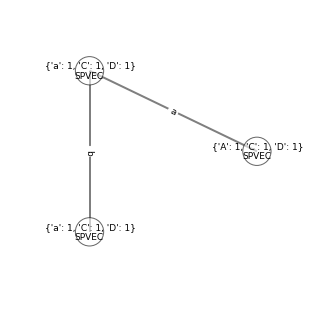

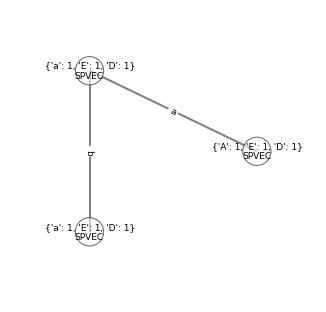

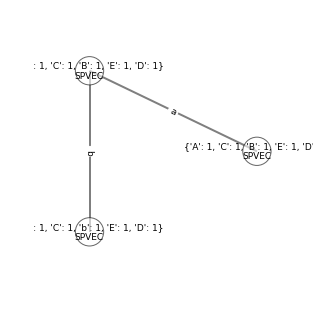

In [281]:
from eden.util import display
for g in graph_list:
    display.draw_graph(g, size=5, node_size=800, node_border=1, layout='shell', secondary_vertex_label = 'entity')

Create a vector representation

In [282]:
%%time
from eden.graph import Vectorizer
vectorizer = Vectorizer(complexity=1, n_discretization_levels=4)
vectorizer.fit(graph_list)
from itertools import islice
X = vectorizer.transform(islice(graph_list,0,12))
print 'Instances: %d \nFeatures: %d with an avg of %d features per instance' % (X.shape[0], X.shape[1],  X.getnnz()/X.shape[0])

Instances: 12 
Features: 1048577 with an avg of 20 features per instance
CPU times: user 1.2 s, sys: 255 ms, total: 1.45 s
Wall time: 1.45 s


In [283]:
from sklearn.svm import OneClassSVM
import numpy as np

def plot2D(X_reduced,labels):
    size=11
    plt.figure(figsize=(size,size))

    #make mesh
    x_min, x_max = X_reduced[:, 0].min(), X_reduced[:, 0].max()
    y_min, y_max = X_reduced[:, 1].min(), X_reduced[:, 1].max()
    step_num = 100
    h = min( ( x_max - x_min ) / step_num  , ( y_max - y_min ) / step_num )# step size in the mesh
    b = h * 50 # border size
    x_min, x_max = X_reduced[:, 0].min() - b, X_reduced[:, 0].max() + b
    y_min, y_max = X_reduced[:, 1].min() - b, X_reduced[:, 1].max() + b
    xx, yy = np.meshgrid( np.arange( x_min, x_max, h ), np.arange( y_min, y_max, h ) )

    #induce a predictive model
    clf = OneClassSVM( gamma = 10**3, nu = 0.01 )
    clf.fit( X_reduced )

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max] . [y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    levels = np.linspace(min(Z), max(Z), 40)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.get_cmap('YlOrRd'), alpha=.9,levels=levels)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
                alpha=.5, 
                s=70, 
                edgecolors='none', 
                c = 'white',
                cmap = plt.get_cmap('YlOrRd'))
    #labels
    for id in range( X_reduced.shape[0] ):
        label = labels[id] 
        x = X_reduced[id, 0]
        y = X_reduced[id, 1]
        plt.annotate(label,xy = (x,y), xytext = (-12, -3), textcoords = 'offset points')
    plt.show()

In [284]:
%%time
import numpy as np

#make dense feature representation
n_components = max(2, X.shape[0])

from sklearn.kernel_approximation import Nystroem
feature_map_nystroem = Nystroem(gamma=0.1, n_components=n_components)
X_explicit=feature_map_nystroem.fit_transform(X)

# Visualize result using PCA
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_explicit)

CPU times: user 13.4 ms, sys: 1.88 ms, total: 15.3 ms
Wall time: 15.3 ms


2D plot using OneClass classifier to identify density curves

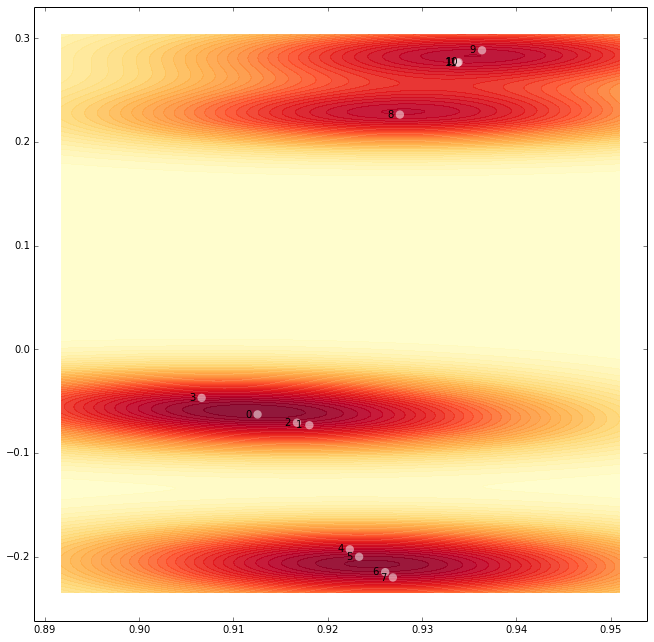

In [285]:
plot2D(X_reduced,range(X_reduced.shape[0]))

Compute pairwise similarity matrix

In [286]:
from ipy_table import * 
def prep_table(K):    
    header = [' ']
    header += [i for i in range(K.shape[0])]
    mat = [header]
    for id, row in enumerate(K):
        new_row = [id]
        new_row += list(row)
        mat.append(new_row)
    return mat

In [287]:
from sklearn import metrics

K=metrics.pairwise.pairwise_kernels(X, metric='linear')

mat=prep_table(K)
make_table(mat)
apply_theme('basic')
set_global_style(float_format = '%0.2f')

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.00,0.38,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.38,1.00,0.50,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.29,0.50,1.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.14,0.14,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,1.00,0.30,0.56,0.41,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.30,1.00,0.42,0.62,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.56,0.42,1.00,0.52,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.41,0.62,0.52,1.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.73,0.42,0.42
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.73,1.00,0.68,0.68
